In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Train Position Data Exploratory Data Analysis

## Data Overview
Initial examination of the dataset structure, data types, and basic statistics.

In [17]:
# Cell 2: Load and Initial Data Overview
# Read the data
df = pd.read_csv('data/train_positions.csv')

# Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst few rows:\n", df.head())
print("\nBasic Statistics:\n", df.describe())

Dataset Shape: (100, 7)

Data Types:
 train_id       object
time_start     object
time_end       object
direction      object
speed           int64
longitude     float64
latitude      float64
dtype: object

First few rows:
   train_id           time_start             time_end direction  speed  \
0    TR001  2024-10-22 08:15:23  2024-10-22 09:30:45         E     45   
1    TR002  2024-10-23 12:30:15  2024-10-23 14:15:30         W     39   
2    TR003  2024-10-24 15:45:30  2024-10-24 17:20:15         E     42   
3    TR004  2024-10-25 07:20:45  2024-10-25 09:10:30         W     37   
4    TR005  2024-10-26 13:55:20  2024-10-26 15:45:10         E     48   

   longitude  latitude  
0    -73.582   40.7128  
1    -74.006   40.7142  
2    -73.995   40.7135  
3    -74.012   40.7115  
4    -73.578   40.7156  

Basic Statistics:
             speed   longitude    latitude
count  100.000000  100.000000  100.000000
mean    41.330000  -73.813730   40.712924
std      6.313454    0.213933    0.001056

In [18]:
# Cell 3: Data Preprocessing
# Convert time columns to datetime
df['time_start'] = pd.to_datetime(df['time_start'])
df['time_end'] = pd.to_datetime(df['time_end'])

# Calculate journey duration
df['duration'] = (df['time_end'] - df['time_start']).dt.total_seconds() / 60  # in minutes

## Data Quality and Summary Statistics
Overview of data quality metrics and summary statistics grouped by direction.

In [19]:
# Cell 9: Summary Statistics and Data Quality
# Summary Statistics by Direction
print("Summary Statistics by Direction:\n")
print(df.groupby('direction')['speed'].describe())

# Data Quality Checks
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# Geographical Bounds
print("\nGeographical Bounds:")
print(f"Longitude range: {df['longitude'].min()} to {df['longitude'].max()}")
print(f"Latitude range: {df['latitude'].min()} to {df['latitude'].max()}")

Summary Statistics by Direction:

           count   mean       std   min    25%   50%    75%   max
direction                                                        
E           50.0  39.00  5.820443  30.0  34.25  38.0  42.75  50.0
W           50.0  43.66  5.964555  30.0  42.25  46.0  48.00  50.0

Missing Values:
 train_id      0
time_start    0
time_end      0
direction     0
speed         0
longitude     0
latitude      0
duration      0
dtype: int64

Duplicate Rows: 0

Geographical Bounds:
Longitude range: -74.046 to -73.578
Latitude range: 40.7107 to 40.7156


## Temporal Analysis
Analysis of journey start times and durations to identify patterns in train schedules.

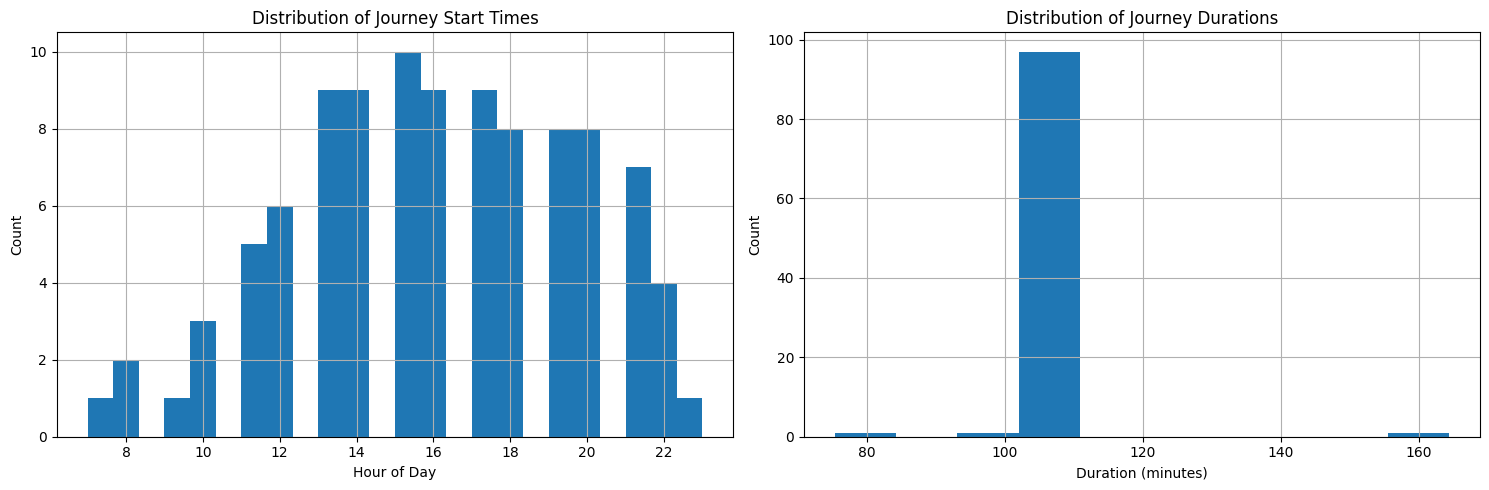

In [20]:
# Cell 4: Temporal Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['time_start'].dt.hour.hist(bins=24)
plt.title('Distribution of Journey Start Times')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['duration'].hist()
plt.title('Distribution of Journey Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()

## Spatial Analysis
Visualization of train positions and speeds across the geographical area.

Text(0, 0.5, 'Latitude')

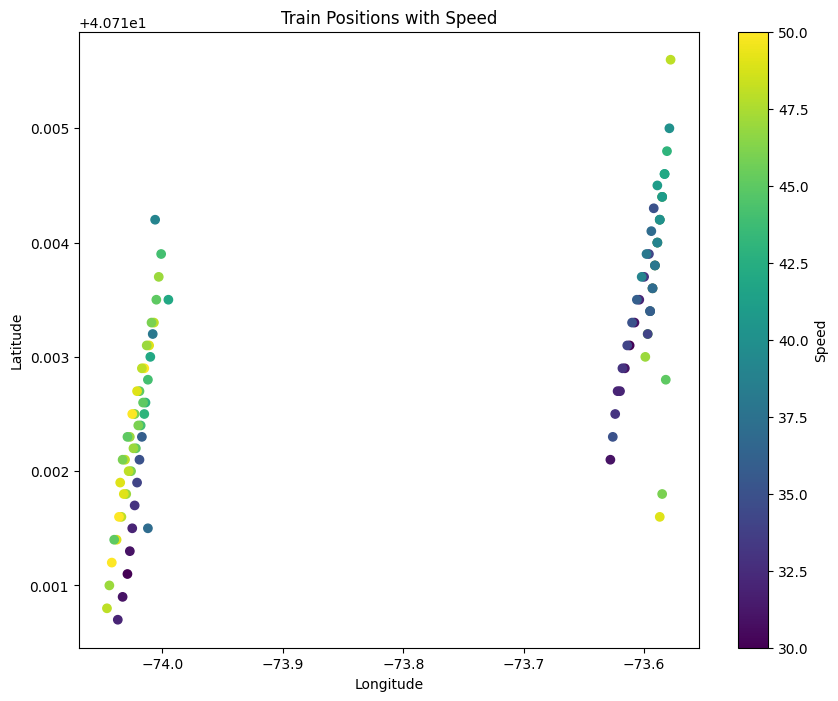

In [21]:
# Cell 5: Spatial Analysis
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['speed'], cmap='viridis')
plt.colorbar(label='Speed')
plt.title('Train Positions with Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Speed Analysis
Distribution of train speeds and their relationship with direction.

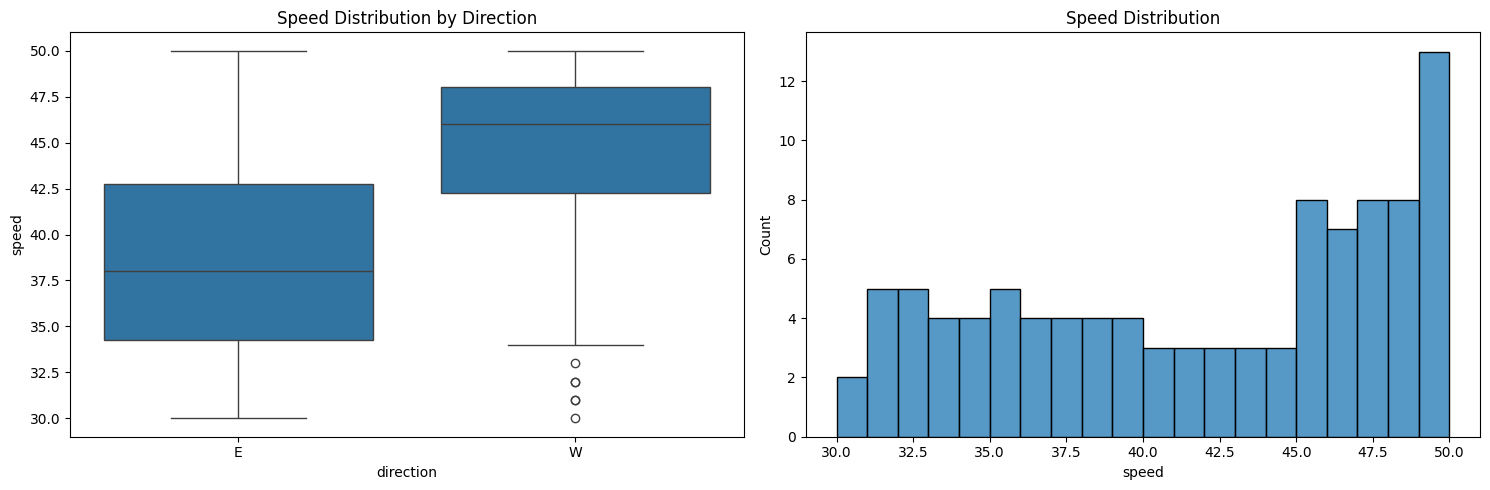

In [22]:
# Cell 6: Speed Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='direction', y='speed', data=df)
plt.title('Speed Distribution by Direction')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='speed', bins=20)
plt.title('Speed Distribution')
plt.tight_layout()

## Direction Analysis
Analysis of train directions and their frequencies.

Text(0, 0.5, 'Count')

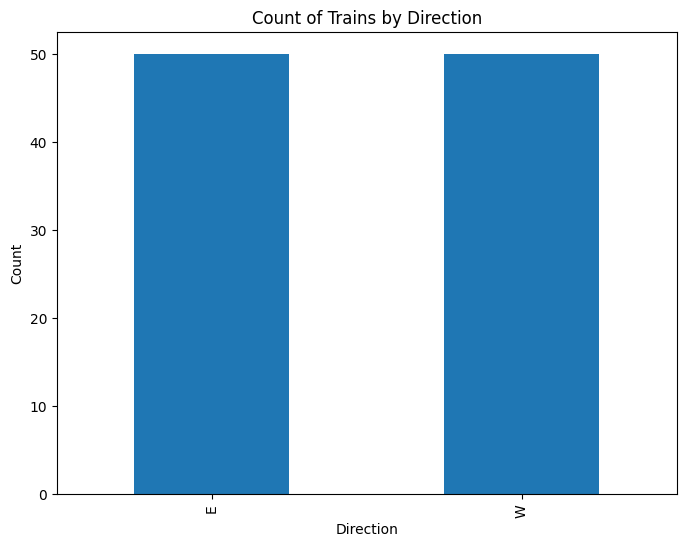

In [23]:
# Cell 8: Direction Analysis
plt.figure(figsize=(8, 6))
df['direction'].value_counts().plot(kind='bar')
plt.title('Count of Trains by Direction')
plt.xlabel('Direction')
plt.ylabel('Count')

# Adding columns for 10-minute intervals and Day of Week



In [24]:
df['day_of_week'] = df['time_start'].dt.dayofweek
# Create 10-minute time segments (0-143)
df['time_segment'] = (df['time_start'].dt.hour * 6) + (df['time_start'].dt.minute // 10)

# Optional: Create human-readable time segment (HH:MM format)
df['time_segment_readable'] = df['time_segment'].apply(
    lambda x: f"{x//6:02d}:{(x%6)*10:02d}"
)

df.head()

,train_id,time_start,time_end,direction,speed,longitude,latitude,duration,day_of_week,time_segment,time_segment_readable
0,TR001,2024-10-22 08:15:23,2024-10-22 09:30:45,E,45,-73.582,40.7128,75.366667,1,49,08:10
1,TR002,2024-10-23 12:30:15,2024-10-23 14:15:30,W,39,-74.006,40.7142,105.250000,2,75,12:30
2,TR003,2024-10-24 15:45:30,2024-10-24 17:20:15,E,42,-73.995,40.7135,94.750000,3,94,15:40
3,TR004,2024-10-25 07:20:45,2024-10-25 09:10:30,W,37,-74.012,40.7115,109.750000,4,44,07:20
4,TR005,2024-10-26 13:55:20,2024-10-26 15:45:10,E,48,-73.578,40.7156,109.833333,5,83,13:50


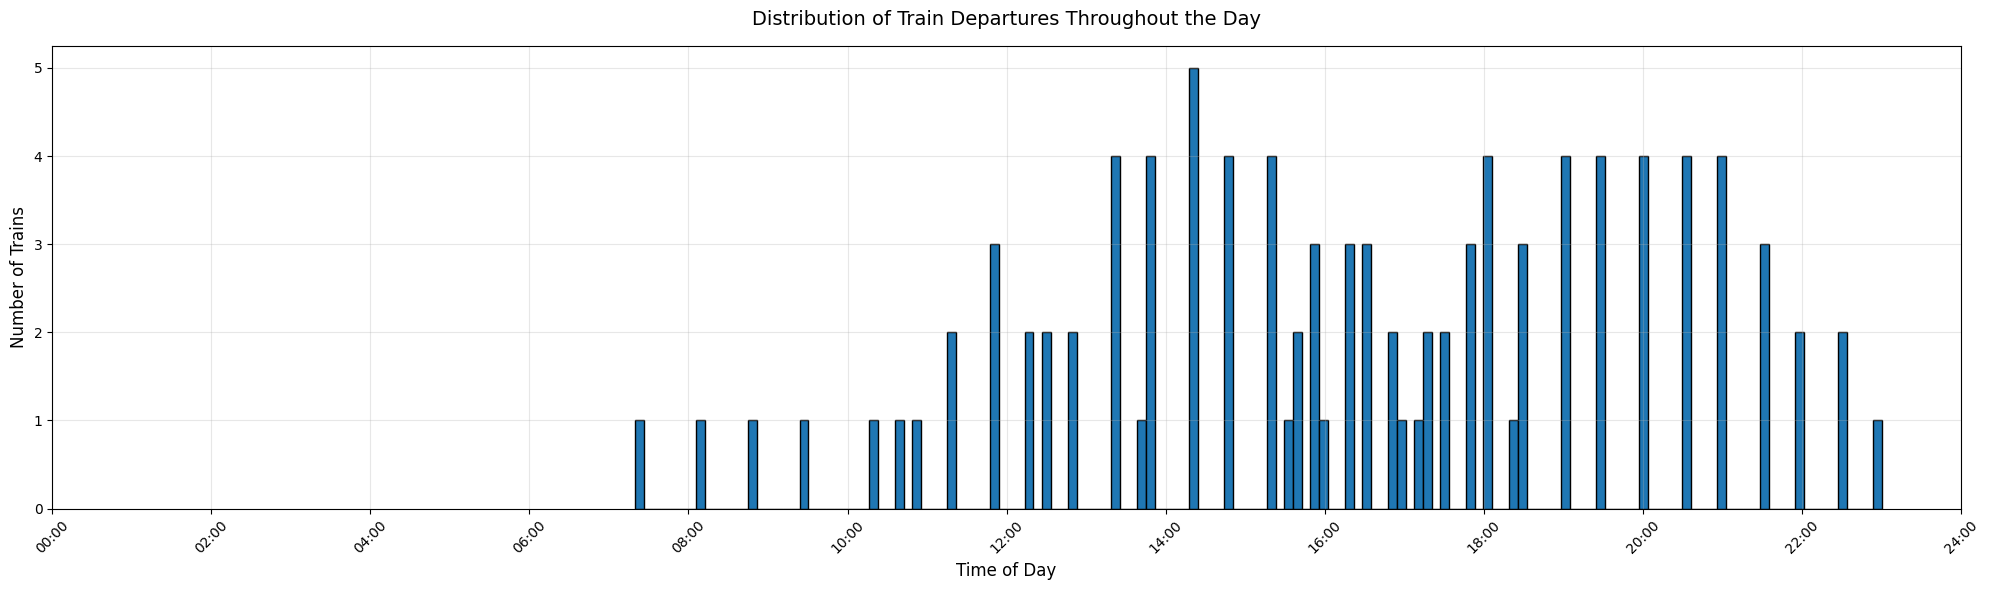

In [25]:
# Create histogram of time segments
plt.figure(figsize=(20, 6))
plt.hist(df['time_segment'], bins=144, edgecolor='black')
plt.title('Distribution of Train Departures Throughout the Day', fontsize=14, pad=15)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Trains', fontsize=12)

# Customize x-axis ticks to show hours
hours = range(0, 25, 2)  # Every 2 hours
hour_positions = [h * 6 for h in hours]  # Convert hours to segment positions
hour_labels = [f'{h:02d}:00' for h in hours]
plt.xticks(hour_positions, hour_labels, rotation=45)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()